In [1]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [1]:
weather = pd.read_csv("weather3_180703.csv")
weather['date'] = pd.to_datetime(weather["date"])

station = weather[weather['station_nbr'] == 10].reset_index(drop=True)

station.loc[(station["date"].dt.year == 2014) & (station["date"].dt.month == 1), "sunrise"] = station.loc[(station["date"].dt.year == 2013)\
                                                                                            & (station["date"].dt.month == 1), "sunrise"].values
station.loc[(station["date"].dt.year == 2014) & (station["date"].dt.month == 1), "sunset"] = station.loc[(station["date"].dt.year == 2013)\
                                                                                            & (station["date"].dt.month == 1), "sunset"].values

In [2]:
# sunset, sunrise 단위를 분으로 고치기
station["sunrise"] = ((station["sunrise"].astype("int64")// 100 * 60) + (station['sunrise'].astype("int64") % 100))
station["sunset"] = ((station['sunset'].astype("int64") // 100 * 60) + (station['sunset'].astype("int64") % 100))

# daytime 계산
station["daytime"] = station["sunset"] - station["sunrise"]

In [3]:
station.head()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing
0,10,2012-01-01,73.0,53.0,63.0,NaN,55.0,58.0,2.0,0.0,...,1,75.130394,63.311968,615,6,1,1,1,0,0
1,10,2012-01-02,65.0,45.0,55.0,NaN,33.0,46.0,10.0,0.0,...,2,43.164565,51.910266,615,0,0,0,0,0,1
2,10,2012-01-03,48.0,34.0,41.0,NaN,11.0,31.0,24.0,0.0,...,3,28.822881,34.066262,616,1,0,0,0,0,1
3,10,2012-01-04,53.0,32.0,42.5,NaN,16.0,33.0,22.0,0.0,...,4,33.885081,38.862209,616,2,0,0,0,0,1
4,10,2012-01-05,68.0,36.0,52.0,NaN,37.0,45.0,13.0,0.0,...,5,56.474904,49.089666,616,3,0,0,0,0,1


In [4]:
len(station)

1035

In [5]:
for i in station.columns:
    count_null = station[i].isna().sum()
    print(i, ":", count_null, "(",round((count_null / len(station) * 100),2),"%",")")

station_nbr : 0 ( 0.0 % )
date : 0 ( 0.0 % )
tmax : 0 ( 0.0 % )
tmin : 0 ( 0.0 % )
tavg : 0 ( 0.0 % )
depart : 1035 ( 100.0 % )
dewpoint : 0 ( 0.0 % )
wetbulb : 0 ( 0.0 % )
heat : 0 ( 0.0 % )
cool : 0 ( 0.0 % )
sunrise : 0 ( 0.0 % )
sunset : 0 ( 0.0 % )
codesum : 0 ( 0.0 % )
snowfall : 1035 ( 100.0 % )
preciptotal : 0 ( 0.0 % )
stnpressure : 0 ( 0.0 % )
sealevel : 0 ( 0.0 % )
resultspeed : 0 ( 0.0 % )
resultdir : 0 ( 0.0 % )
avgspeed : 0 ( 0.0 % )
year : 0 ( 0.0 % )
month : 0 ( 0.0 % )
day : 0 ( 0.0 % )
relative_humility : 0 ( 0.0 % )
windchill : 0 ( 0.0 % )
daytime : 0 ( 0.0 % )
week7 : 0 ( 0.0 % )
weekend : 0 ( 0.0 % )
code_change : 0 ( 0.0 % )
rainY : 0 ( 0.0 % )
otherY : 0 ( 0.0 % )
nothing : 0 ( 0.0 % )


In [6]:
train = pd.read_csv("train.csv")
train.date = pd.to_datetime(train.date)
train.tail()

,date,store_nbr,item_nbr,units
4617595,2014-10-31,45,107,0
4617596,2014-10-31,45,108,0
4617597,2014-10-31,45,109,0
4617598,2014-10-31,45,110,0
4617599,2014-10-31,45,111,0


In [7]:
key = pd.read_csv("key.csv")
station = station.merge(key)

In [8]:
station = station.merge(train)
station.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,units
299029,10,2014-10-31,77.0,63.0,70.0,NaN,51.0,59.0,0.0,5.0,...,661,4,0,0,0,0,1,27,107,0
299030,10,2014-10-31,77.0,63.0,70.0,NaN,51.0,59.0,0.0,5.0,...,661,4,0,0,0,0,1,27,108,0
299031,10,2014-10-31,77.0,63.0,70.0,NaN,51.0,59.0,0.0,5.0,...,661,4,0,0,0,0,1,27,109,0
299032,10,2014-10-31,77.0,63.0,70.0,NaN,51.0,59.0,0.0,5.0,...,661,4,0,0,0,0,1,27,110,0
299033,10,2014-10-31,77.0,63.0,70.0,NaN,51.0,59.0,0.0,5.0,...,661,4,0,0,0,0,1,27,111,0


In [9]:
station['log1p_units'] = np.log1p(station.units)

In [10]:
# # units가 다 0인 item_number 골라내기
# stn_real = pd.DataFrame(columns = station.columns)
# station["item_nbr"] = station["item_nbr"].astype("str")
# item_number = station.groupby("item_nbr")["units"].agg(sum)
# stn_item = item_number[item_number != 0].index
# stn_real = pd.DataFrame(columns = station.columns)
# for i in range(len(stn_item)):
#     stn_real = pd.concat([stn_real, station[station["item_nbr"] == stn_item[i]]], ignore_index=True)

## 전체 데이터로 OLS

In [11]:
target1 = station['units']
target2 = station['log1p_units']

station.drop(columns=['units','log1p_units'],inplace=True)
station.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr
299029,10,2014-10-31,77.0,63.0,70.0,NaN,51.0,59.0,0.0,5.0,...,71.153462,661,4,0,0,0,0,1,27,107
299030,10,2014-10-31,77.0,63.0,70.0,NaN,51.0,59.0,0.0,5.0,...,71.153462,661,4,0,0,0,0,1,27,108
299031,10,2014-10-31,77.0,63.0,70.0,NaN,51.0,59.0,0.0,5.0,...,71.153462,661,4,0,0,0,0,1,27,109
299032,10,2014-10-31,77.0,63.0,70.0,NaN,51.0,59.0,0.0,5.0,...,71.153462,661,4,0,0,0,0,1,27,110
299033,10,2014-10-31,77.0,63.0,70.0,NaN,51.0,59.0,0.0,5.0,...,71.153462,661,4,0,0,0,0,1,27,111


In [12]:
len(station)

299034

In [13]:
df1 = pd.concat([station,target1], axis=1)
df2 = pd.concat([station,target2], axis=1)

In [14]:
df2.to_csv("station10.csv", sep=",", index=False)

### 1. OLS : df1 (units) 

In [16]:
model1 = sm.OLS.from_formula('units ~ tmax + tmin + tavg + dewpoint + wetbulb + heat + cool + preciptotal + stnpressure + sealevel \
                            + resultspeed + C(resultdir) + avgspeed + sunset + sunrise + daytime + C(year) + C(month) + relative_humility \
                            + windchill + C(weekend) + C(rainY) + C(item_nbr)+ 0', data = df1)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     5338.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        10:18:57   Log-Likelihood:            -7.4098e+05
No. Observations:              299034   AIC:                         1.482e+06
Df Residuals:                  298858   BIC:                         1.484e+06
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(resultdir)[1.0]      2.2108      2

### 2. OLS : df1 (units) - 스케일링 
- conditional number가 너무 높음.

In [17]:
model1_1 = sm.OLS.from_formula('units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + scale(sunset) + scale(sunrise) + scale(daytime) + C(year)\
                            + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df1)
result1_1 = model1_1.fit()
print(result1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     5282.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        10:21:57   Log-Likelihood:            -7.4091e+05
No. Observations:              299034   AIC:                         1.482e+06
Df Residuals:                  298856   BIC:                         1.484e+06
Df Model:                         177                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

### 3. OLS :  df1 (units) - 아웃라이어 제거 

In [18]:
# 아웃라이어 제거
# Cook's distance > 2 인 값 제거
influence = result1.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df1) - 2)
idx_outlier = np.where(cooks_d2 > fox_cr)[0]
len(idx_outlier)

4500

In [19]:
idx = list(set(range(len(df1))).difference(idx_outlier))
df1_1 = df1.iloc[idx, :].reset_index(drop=True)
df1_1.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,units
294529,10,2014-10-31,77.0,63.0,70.0,NaN,51.0,59.0,0.0,5.0,...,661,4,0,0,0,0,1,27,107,0
294530,10,2014-10-31,77.0,63.0,70.0,NaN,51.0,59.0,0.0,5.0,...,661,4,0,0,0,0,1,27,108,0
294531,10,2014-10-31,77.0,63.0,70.0,NaN,51.0,59.0,0.0,5.0,...,661,4,0,0,0,0,1,27,109,0
294532,10,2014-10-31,77.0,63.0,70.0,NaN,51.0,59.0,0.0,5.0,...,661,4,0,0,0,0,1,27,110,0
294533,10,2014-10-31,77.0,63.0,70.0,NaN,51.0,59.0,0.0,5.0,...,661,4,0,0,0,0,1,27,111,0


In [21]:
# OLS - df1_1
model1_1_1 = sm.OLS.from_formula('units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + scale(sunset) + scale(sunrise) + scale(daytime) + C(year)\
                            + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0',  data = df1_1)
result1_1_1 = model1_1_1.fit()
print(result1_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 1.006e+05
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        10:28:31   Log-Likelihood:                -73304.
No. Observations:              294534   AIC:                         1.470e+05
Df Residuals:                  294356   BIC:                         1.488e+05
Df Model:                         177                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

### 4. 변수변환 : df2 (log1p_units) 

In [26]:
model2 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + scale(sunset) + scale(sunrise) + scale(daytime) + C(year)\
                            + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 1.615e+04
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        10:41:55   Log-Likelihood:             1.4025e+05
No. Observations:              299034   AIC:                        -2.801e+05
Df Residuals:                  298856   BIC:                        -2.782e+05
Df Model:                         177                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

### 5. 변수변환 : df2 (log1p_units) + 아웃라이어 제거

In [27]:
# 아웃라이어 제거
# Cook's distance > 2 인 값 제거
influence = result2.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df2) - 2)
idx_outlier = np.where(cooks_d2 > fox_cr)[0]
len(idx_outlier)

8125

In [28]:
idx = list(set(range(len(df2))).difference(idx_outlier))
df2_1 = df2.iloc[idx, :].reset_index(drop=True)
df2_1.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,log1p_units
290904,10,2014-10-31,77.0,63.0,70.0,NaN,51.0,59.0,0.0,5.0,...,661,4,0,0,0,0,1,27,107,0.0
290905,10,2014-10-31,77.0,63.0,70.0,NaN,51.0,59.0,0.0,5.0,...,661,4,0,0,0,0,1,27,108,0.0
290906,10,2014-10-31,77.0,63.0,70.0,NaN,51.0,59.0,0.0,5.0,...,661,4,0,0,0,0,1,27,109,0.0
290907,10,2014-10-31,77.0,63.0,70.0,NaN,51.0,59.0,0.0,5.0,...,661,4,0,0,0,0,1,27,110,0.0
290908,10,2014-10-31,77.0,63.0,70.0,NaN,51.0,59.0,0.0,5.0,...,661,4,0,0,0,0,1,27,111,0.0


In [29]:
# OLS - df2_1
model2_1 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)
result2_1 = model2_1.fit()
print(result2_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 6.747e+05
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        10:43:00   Log-Likelihood:             8.0751e+05
No. Observations:              290909   AIC:                        -1.615e+06
Df Residuals:                  290733   BIC:                        -1.613e+06
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

### 6. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환 

In [30]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + scale(sunset) + scale(sunrise) + scale(daytime) \
                            + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 6.671e+05
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        10:44:16   Log-Likelihood:             8.0751e+05
No. Observations:              290909   AIC:                        -1.615e+06
Df Residuals:                  290731   BIC:                        -1.613e+06
Df Model:                         177                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

### 6 - 1. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환  + tmax/sunset/sunrise/daytime/stnpressure/sealevel제거(VIF에 근거)

In [32]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 6.825e+05
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        10:48:48   Log-Likelihood:             8.0751e+05
No. Observations:              290909   AIC:                        -1.615e+06
Df Residuals:                  290735   BIC:                        -1.613e+06
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

### 6 - 2. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환  + tmax/sunset/sunrise/daytime/stnpressure/sealevel제거 + wetbulb/windchill제거(VIF에 근거) --> 아래 VIF부분으로 갈 것.

In [40]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(tavg) + scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(dewpoint) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 6.987e+05
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        10:55:16   Log-Likelihood:             8.0750e+05
No. Observations:              290909   AIC:                        -1.615e+06
Df Residuals:                  290739   BIC:                        -1.613e+06
Df Model:                         169                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

### 6 - 3. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환  + tmax/sunset/sunrise/daytime/stnpressure/sealevel제거 + wetbulb/windchill제거+dewpoint/tmin제거 (VIF에 근거) --> 아래 VIF부분으로 갈 것.

In [45]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(tavg) + scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(avgspeed) + scale(relative_humility) + scale(resultspeed)  \
                            + C(resultdir) + C(year) + C(month) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 6.987e+05
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        11:01:04   Log-Likelihood:             8.0750e+05
No. Observations:              290909   AIC:                        -1.615e+06
Df Residuals:                  290739   BIC:                        -1.613e+06
Df Model:                         169                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

### 6 - 4. 변수변환 : df2 (log1p_units) + tmax/sunset/sunrise/daytime/stnpressure/sealevel제거 + wetbulb/windchill제거+dewpoint/tmin제거 (VIF에 근거)  + tavg/avgspeed제거

In [53]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(relative_humility) + scale(resultspeed)  \
                            + C(resultdir) + C(year) + C(month) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 1.701e+04
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        11:12:43   Log-Likelihood:             1.4024e+05
No. Observations:              299034   AIC:                        -2.801e+05
Df Residuals:                  298865   BIC:                        -2.783e+05
Df Model:                         168                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

### 6 - 5. 변수변환 : df2 (log1p_units) + tmax/sunset/sunrise/daytime/stnpressure/sealevel제거 + wetbulb/windchill제거+dewpoint/tmin제거 (VIF에 근거)  + tavg/avgspeed제거 +  유의하지 않은 변수 제거 -> 정규화

In [55]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ C(year) + C(month) + C(weekend) \
                            + scale(np.log1p(preciptotal)) + C(store_nbr) + C(item_nbr) + 0', data = df2)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 2.251e+04
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        11:14:43   Log-Likelihood:             1.4022e+05
No. Observations:              299034   AIC:                        -2.802e+05
Df Residuals:                  298906   BIC:                        -2.788e+05
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(year)[2012]   

### F- 검정

In [57]:
sm.stats.anova_lm(model2_1_1.fit())

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
C(year),3.0,1685.068478,561.689493,24494.960832,0.000000e+00
C(month),11.0,2.392001,0.217455,9.483076,2.507580e-17
C(weekend),1.0,4.211255,4.211255,183.650453,7.957939e-42
C(store_nbr),2.0,0.666230,0.333115,14.526958,4.912799e-07
C(item_nbr),110.0,65524.167992,595.674254,25977.017050,0.000000e+00
scale(np.log1p(preciptotal)),1.0,0.224799,0.224799,9.803347,1.742113e-03
Residual,298906.0,6854.159135,0.022931,NaN,NaN


### 7. result2의 잔차의 정규성 검정 : 정규성을 띄지 않음.

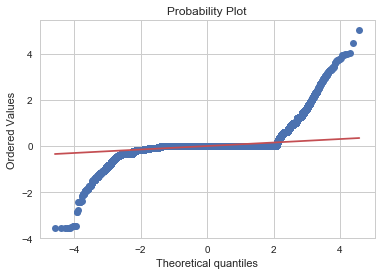

In [58]:
%matplotlib inline
sp.stats.probplot(result2_1_1.resid, plot=plt)
plt.show()

### 8.  다중공선성 감소시키기 : VIF

In [122]:
df2_1.columns

Index(['station_nbr', 'date', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed', 'year', 'month', 'day', 'relative_humility', 'windchill', 'daytime', 'week7', 'weekend', 'code_change', 'rainY', 'otherY', 'nothing', 'store_nbr', 'item_nbr', 'log1p_units'], dtype='object')

In [16]:
# sampleX = df2_1.loc[:, cols]
# sampley = df2_1.loc[:,"log1p_units"]
# sns.pairplot(sampleX)
# plt.show()

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

cols = ['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise', 'sunset',\
          'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'avgspeed', \
        'relative_humility', 'windchill', 'daytime', 'item_nbr']

y = df2_1.loc[:,cols]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(y.values, i) for i in range(y.shape[1])]
vif["features"] = y.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)

vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,inf,daytime
1,inf,sunrise
2,inf,sunset
3,3.071836e+06,tmax
4,1.277966e+06,stnpressure
5,5.207070e+04,sealevel
6,3.498126e+04,windchill
7,1.627873e+04,tmin
8,1.146087e+04,dewpoint
9,1.038400e+04,tavg


tmax, sunrise, daytime, sunset, stnpressure, sealevel를 빼고 df2_1을 다시 OLS돌려본다(6-1번 참조)

In [35]:
cols = ['tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool', 'preciptotal', 'resultspeed', 'avgspeed', \
        'relative_humility', 'windchill', 'item_nbr']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,38913.706730,windchill
1,34217.738692,tavg
2,8452.081621,wetbulb
3,6057.133745,dewpoint
4,1609.867232,relative_humility
5,1025.693891,tmin
6,91.683096,avgspeed
7,87.603986,cool
8,38.642535,resultspeed
9,11.232851,heat


### VIF : windchill 버리고 다시 

In [37]:
cols = ['tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool', 'preciptotal', 'resultspeed', 'avgspeed', \
        'relative_humility', 'item_nbr']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,8322.871378,wetbulb
1,4860.573111,tavg
2,4482.732424,dewpoint
3,1133.456696,relative_humility
4,1025.504938,tmin
5,87.258824,cool
6,71.108546,avgspeed
7,38.203342,resultspeed
8,10.832439,heat
9,4.041466,item_nbr


### VIF : wetbulb 버리고 다시 

In [41]:
cols = ['tmin', 'tavg', 'dewpoint', 'heat', 'cool', 'preciptotal', 'resultspeed', 'avgspeed', \
        'relative_humility', 'item_nbr']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,4128.931528,dewpoint
1,1507.981028,tavg
2,1017.260674,tmin
3,1017.071211,relative_humility
4,85.878844,cool
5,70.691775,avgspeed
6,37.941300,resultspeed
7,10.786301,heat
8,4.041457,item_nbr
9,1.231647,preciptotal


### VIF : dewpoint 버리고 다시 

In [43]:
cols = ['tmin', 'tavg', 'heat', 'cool', 'preciptotal', 'resultspeed', 'avgspeed', \
        'relative_humility', 'item_nbr']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,1017.241333,tmin
1,761.914958,tavg
2,70.529455,avgspeed
3,49.760486,relative_humility
4,37.939377,resultspeed
5,13.071637,cool
6,4.038375,item_nbr
7,1.803773,heat
8,1.204159,preciptotal


### VIF :  tmin 버리고 다시 

In [46]:
cols = ['tavg', 'heat', 'cool', 'preciptotal', 'resultspeed', 'avgspeed', \
        'relative_humility', 'item_nbr']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,77.541667,tavg
1,69.691129,avgspeed
2,37.051314,relative_humility
3,35.813974,resultspeed
4,7.987977,cool
5,4.038214,item_nbr
6,1.566795,heat
7,1.203179,preciptotal


### VIF :  tavg 버리고 다시 

In [48]:
cols = [ 'heat', 'cool', 'preciptotal', 'resultspeed', 'avgspeed', \
        'relative_humility', 'item_nbr']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,57.538327,avgspeed
1,32.331407,resultspeed
2,11.618925,relative_humility
3,3.831346,item_nbr
4,3.372022,cool
5,1.561738,heat
6,1.138616,preciptotal


### VIF :  avgspeed 버리고 다시 

In [50]:
cols = [ 'heat', 'cool', 'preciptotal', 'resultspeed', \
        'relative_humility', 'item_nbr']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,8.350899,relative_humility
1,4.455992,resultspeed
2,3.787577,item_nbr
3,3.182852,cool
4,1.486699,heat
5,1.132392,preciptotal


### 9. 정규화 후 Cross validation(교차검증)
- 6-4번 model 사용
- 순수 Ridge모형(L1_wt=0), 순수 lasso모형(L1_wt=1)

In [60]:
from patsy import dmatrix

In [61]:
# 독립변수와 종속변수로 나누기
df2_1_target = df2_1['log1p_units']
df2_1_X = df2_1.drop(columns=['log1p_units'])

In [62]:
len(df2_1_X), len(df2_1_target)

(290909, 290909)

##### scikit learn에서 적용할 때 사용하는 코드 :df2_1(log1p_units) 대상

In [63]:
formula = 'C(year) + C(month) + C(weekend) \
                            + scale(np.log1p(preciptotal)) + C(store_nbr) + C(item_nbr)'
dfX = dmatrix(formula, df2_1_X, return_type='dataframe')
dfy = pd.DataFrame(df2_1_target, columns=["log1p_units"])

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

model = LinearRegression()
cv = KFold(10, shuffle=True, random_state=0)

scores = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(dfX)):
    X_train = dfX.values[train_index]
    y_train = dfy.values[train_index]
    X_test = dfX.values[test_index]
    y_test = dfy.values[test_index]
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[i] = r2_score(y_test, y_pred)

scores

array([ 9.97510196e-01,  9.97749795e-01,  9.97700887e-01,  9.97256362e-01,
        9.97387541e-01,  9.97504617e-01, -9.26732884e+15,  9.97624880e-01,
        9.97779927e-01,  9.97621137e-01])

In [66]:
# Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

cv = KFold(10, shuffle=True, random_state=0)

scores1 = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(dfX)):
    X_train = dfX.values[train_index]
    y_train = dfy.values[train_index]
    X_test = dfX.values[test_index]
    y_test = dfy.values[test_index]
    model = sm.OLS(y_train, X_train)
    model = model.fit_regularized(alpha=0.01, L1_wt=0)
    y_pred = model.predict(X_test)
    scores1[i] = r2_score(y_test, y_pred)

scores1

array([0.46611436, 0.47058693, 0.4718668 , 0.46934816, 0.4738532 ,
       0.46693845, 0.47037626, 0.47068239, 0.4675848 , 0.47381468])

In [67]:
# Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

cv = KFold(10, shuffle=True, random_state=0)

scores2 = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(dfX)):
    X_train = dfX.values[train_index]
    y_train = dfy.values[train_index]
    X_test = dfX.values[test_index]
    y_test = dfy.values[test_index]
    model = sm.OLS(y_train, X_train)
    model = model.fit_regularized(alpha=0.01, L1_wt=1)
    y_pred = model.predict(X_test)
    scores2[i] = r2_score(y_test, y_pred)

scores2

array([0.40119128, 0.41762282, 0.4219704 , 0.40711455, 0.42895737,
       0.39700265, 0.40487201, 0.413943  , 0.40509088, 0.43092495])

In [68]:
# Elasic net
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

cv = KFold(10, shuffle=True, random_state=0)

scores3 = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(dfX)):
    X_train = dfX.values[train_index]
    y_train = dfy.values[train_index]
    X_test = dfX.values[test_index]
    y_test = dfy.values[test_index]
    model = sm.OLS(y_train, X_train)
    model = model.fit_regularized(alpha=0.01, L1_wt=0.5)
    y_pred = model.predict(X_test)
    scores3[i] = r2_score(y_test, y_pred)

scores3

array([0.44879202, 0.45567582, 0.45765672, 0.45251573, 0.46065707,
       0.44855119, 0.45301285, 0.45491408, 0.45060946, 0.4610392 ])

### station 평균성능

In [68]:
scores.mean(), scores1.mean(), scores2.mean(), scores3.mean()

(0.0, 0.10442080707215833, -0.010450148815664907, -0.010450148815664907)